In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.4 MB/s 
     |████████████████████████████████| 173.6 MB 7.5 kB/s 
     |████████████████████████████████| 160 kB 42.0 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=a8df222b8e3127d505b5f9e0439bde577a86bcb0385b122f27467334b475e303
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rand

In [ ]:
cuaca = pd.read_csv("weatherAUS.csv")
cuaca

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
cuaca.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
cuaca.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
cuaca.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


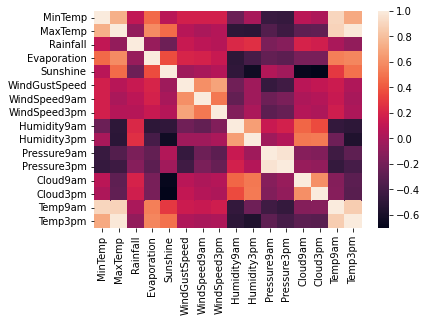

In [ ]:
sns.heatmap(cuaca.corr())

In [ ]:
def toNumeric(dataset) :
  tmp = dataset.copy()
  listcol = list(tmp.columns)
  datatypecol = dict(tmp.dtypes)
  variasi = []
  for x in listcol:
    if datatypecol.get(x) == "object" :
      variasi.append((x,list(dataset.groupby(x).groups.keys())))
  for x in variasi:
    #tmp[x[0]] = tmp[x[0]].replace([])
    for i in x[1] :
      idx = x[1].index(i)
      tmp[x[0]] = tmp[x[0]].replace([i],idx)

  return tmp

numerick = toNumeric(cuaca)
numerick.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,NaN,NaN,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,NaN,NaN,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,NaN,NaN,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,NaN,NaN,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [ ]:
def DoNotDropList(dataset):
  dropnanlist = []
  datatypecol = dict(dataset.dtypes)
  listcol = list(dataset.columns)
  for x in listcol:
    ngroup = dataset.groupby(x).ngroups
    if ngroup > 5:
      dropnanlist.append(x)
  return dropnanlist

nodrop = DoNotDropList(numerick)
print(nodrop)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
def DropNan(dataset):
  droplist = []
  datatypecol = dict(dataset.dtypes)
  listcol = list(dataset.columns)
  for x in listcol:
    ngroup = dataset.groupby(x).ngroups
    if ngroup <= 5:
      dataset = dataset[dataset[x].notna()]
  return dataset

print(DropNan(numerick))

        Date  Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0        396         2     13.4  ...     21.8        0.0           0.0
1        397         2      7.4  ...     24.3        0.0           0.0
2        398         2     12.9  ...     23.2        0.0           0.0
3        399         2      9.2  ...     26.5        0.0           0.0
4        400         2     17.5  ...     29.7        0.0           0.0
...      ...       ...      ...  ...      ...        ...           ...
145454  3430        41      3.5  ...     20.9        0.0           0.0
145455  3431        41      2.8  ...     22.4        0.0           0.0
145456  3432        41      3.6  ...     24.5        0.0           0.0
145457  3433        41      5.4  ...     26.1        0.0           0.0
145458  3434        41      7.8  ...     26.0        0.0           0.0

[140787 rows x 23 columns]


In [ ]:
def FillNanSkew(dataset):
  dndlist = DoNotDropList(dataset)
  skew = dataset[dndlist].skew(axis=0, skipna=True)
  #skewness > 2 or < -2 = median
  #else mean
  for i in range(len(skew)):
    if skew[i] > -2 and skew[i] < 2 :
      dataset[dndlist[i]].fillna(dataset[dndlist[i]].mean(),inplace=True)
    else:
      dataset[dndlist[i]].fillna(dataset[dndlist[i]].median(),inplace=True)
  return dataset

print(FillNanSkew(numerick))

        Date  Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0        396         2     13.4  ...     21.8        0.0           0.0
1        397         2      7.4  ...     24.3        0.0           0.0
2        398         2     12.9  ...     23.2        0.0           0.0
3        399         2      9.2  ...     26.5        0.0           0.0
4        400         2     17.5  ...     29.7        0.0           0.0
...      ...       ...      ...  ...      ...        ...           ...
145455  3431        41      2.8  ...     22.4        0.0           0.0
145456  3432        41      3.6  ...     24.5        0.0           0.0
145457  3433        41      5.4  ...     26.1        0.0           0.0
145458  3434        41      7.8  ...     26.0        0.0           0.0
145459  3435        41     14.9  ...     20.9        0.0           NaN

[145460 rows x 23 columns]


In [ ]:
def MinMaxScalar(dataset):
  return (dataset - dataset.min()) / (dataset.max() - dataset.min())

MinMaxScalar(numerick)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.516509,0.523629,0.001617,0.033103,0.524909,0.866667,0.294574,0.866667,0.933333,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0,0.0
1,0.115575,0.041667,0.375000,0.565217,0.000000,0.033103,0.524909,0.933333,0.294574,0.400000,1.000000,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0,0.0
2,0.115866,0.041667,0.504717,0.576560,0.000000,0.033103,0.524909,1.000000,0.310078,0.866667,1.000000,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0,0.0
3,0.116157,0.041667,0.417453,0.620038,0.000000,0.033103,0.524909,0.266667,0.139535,0.600000,0.000000,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0,0.0
4,0.116448,0.041667,0.613208,0.701323,0.002695,0.033103,0.524909,0.866667,0.271318,0.066667,0.466667,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.998836,0.854167,0.266509,0.533081,0.000000,0.033103,0.524909,0.000000,0.193798,0.600000,0.066667,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.494162,0.501103,0.364979,0.533589,0.0,0.0
145456,0.999127,0.854167,0.285377,0.568998,0.000000,0.033103,0.524909,0.400000,0.124031,0.600000,0.200000,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.494162,0.501103,0.381857,0.573896,0.0,0.0
145457,0.999418,0.854167,0.327830,0.599244,0.000000,0.033103,0.524909,0.200000,0.240310,0.600000,0.933333,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.494162,0.501103,0.415612,0.604607,0.0,0.0
145458,0.999709,0.854167,0.384434,0.601134,0.000000,0.033103,0.524909,0.600000,0.170543,0.666667,0.200000,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0.0,0.0


In [ ]:
def PreProcessing(dataset,dtype=int,minmax=True):

  try:
    dataset = dataset.drop(columns=['id']) #drop the id column
  except:
    dataset = dataset
  dataset = toNumeric(dataset)        #changing enum value to their index
  dataset = FillNanSkew(dataset)      #Fill the NaN values
  dataset = DropNan(dataset)          #Drop the row if the data was enum
  dataset = dataset.astype(dtype)
  if minmax:
    dataset = MinMaxScalar(dataset)
  dataset = dataset.drop_duplicates() #drop duplicate values
  return dataset

prep = PreProcessing(cuaca)
prep.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.512195,0.500000,0.000000,0.027586,0.5,0.866667,0.294574,0.866667,0.933333,0.153846,0.275862,0.71,0.22,0.442623,0.483871,0.888889,0.444444,0.489362,0.509804,0.0,0.0
1,0.115575,0.041667,0.365854,0.557692,0.000000,0.027586,0.5,0.933333,0.294574,0.400000,1.000000,0.030769,0.252874,0.44,0.25,0.491803,0.483871,0.444444,0.444444,0.510638,0.568627,0.0,0.0
2,0.115866,0.041667,0.487805,0.557692,0.000000,0.027586,0.5,1.000000,0.310078,0.866667,1.000000,0.146154,0.298851,0.38,0.30,0.442623,0.500000,0.444444,0.222222,0.595745,0.549020,0.0,0.0
3,0.116157,0.041667,0.414634,0.615385,0.000000,0.027586,0.5,0.266667,0.139535,0.600000,0.000000,0.084615,0.103448,0.45,0.16,0.606557,0.564516,0.444444,0.444444,0.531915,0.607843,0.0,0.0
4,0.116448,0.041667,0.609756,0.692308,0.002695,0.027586,0.5,0.866667,0.271318,0.066667,0.466667,0.053846,0.229885,0.82,0.33,0.491803,0.467742,0.777778,0.888889,0.510638,0.666667,0.0,0.0


In [ ]:
prep.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.560206,0.494168,0.481941,0.515198,0.005972,0.031926,0.507723,0.510874,0.263352,0.485375,0.515574,0.107620,0.214021,0.688179,0.514381,0.609576,0.610100,0.474444,0.477815,0.500871,0.514579,0.223423,0.221618
std,0.258085,0.296529,0.154984,0.136759,0.022631,0.022331,0.194995,0.300761,0.101797,0.292202,0.302968,0.068099,0.100219,0.189609,0.205471,0.110734,0.107864,0.254862,0.235952,0.137890,0.134843,0.416541,0.415337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337991,0.229167,0.365854,0.403846,0.000000,0.027586,0.500000,0.266667,0.193798,0.200000,0.266667,0.053846,0.149425,0.570000,0.370000,0.540984,0.548387,0.333333,0.444444,0.404255,0.411765,0.000000,0.000000
50%,0.566230,0.500000,0.487805,0.500000,0.000000,0.027586,0.500000,0.533333,0.255814,0.466667,0.533333,0.100000,0.206897,0.700000,0.510000,0.606557,0.612903,0.444444,0.444444,0.489362,0.509804,0.000000,0.000000
75%,0.783697,0.750000,0.585366,0.615385,0.000000,0.034483,0.571429,0.733333,0.310078,0.733333,0.800000,0.146154,0.275862,0.830000,0.650000,0.672131,0.677419,0.666667,0.666667,0.595745,0.607843,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  float64
 1   Location       140787 non-null  float64
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  float64
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  float64
 10  WindDir3pm     140787 non-null  float64
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [ ]:
prep.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.021569,0.015317,0.038164,-0.012274,0.029007,0.001142,0.001438,-0.025427,-0.002714,0.000434,-0.016806,-0.026905,0.001562,-0.010691,0.034396,0.028970,0.042068,0.017927,0.025647,0.025195,-0.011015,-0.011982
Location,0.021569,1.000000,-0.006709,-0.020707,-0.003500,0.025435,0.002275,0.032398,0.069197,-0.012124,0.012926,0.076850,0.064547,-0.002905,0.010581,0.035790,0.046822,-0.014886,-0.018449,-0.015659,-0.022297,-0.004168,-0.005275
MinTemp,0.015317,-0.006709,1.000000,0.733211,0.104288,0.375783,0.058148,-0.153048,0.173457,-0.064080,-0.158357,0.173739,0.173612,-0.231544,0.006319,-0.423262,-0.435736,0.075573,0.032156,0.897390,0.698479,0.055398,0.083877
MaxTemp,0.038164,-0.020707,0.733211,1.000000,-0.068469,0.455613,0.335198,-0.209918,0.067201,-0.237140,-0.177917,0.014296,0.050900,-0.500637,-0.500020,-0.308165,-0.398256,-0.220393,-0.207124,0.880535,0.968339,-0.228189,-0.158936
Rainfall,-0.012274,-0.003500,0.104288,-0.068469,1.000000,-0.041291,-0.165822,0.039780,0.126342,0.080174,0.045014,0.085362,0.055939,0.214773,0.243281,-0.158311,-0.120552,0.169599,0.144931,0.014920,-0.071738,0.488442,0.234143
Evaporation,0.029007,0.025435,0.375783,0.455613,-0.041291,1.000000,0.288132,-0.066553,0.149802,-0.083969,-0.047725,0.154674,0.105233,-0.393406,-0.301540,-0.214531,-0.236435,-0.155790,-0.146134,0.434555,0.442153,-0.142819,-0.090476
Sunshine,0.001142,0.002275,0.058148,0.335198,-0.165822,0.288132,1.000000,-0.060028,-0.019671,-0.081880,-0.032941,0.011234,0.043136,-0.357029,-0.448564,0.029057,-0.017757,-0.535749,-0.555973,0.215399,0.353187,-0.238994,-0.326390
WindGustDir,0.001438,0.032398,-0.153048,-0.209918,0.039780,-0.066553,-0.060028,1.000000,0.143071,0.386673,0.585594,0.035786,0.102446,0.055202,0.042907,-0.129459,-0.039542,0.061669,0.057830,-0.186481,-0.222660,0.126774,0.046908
WindGustSpeed,-0.025427,0.069197,0.173457,0.067201,0.126342,0.149802,-0.019671,0.143071,1.000000,0.036859,0.139157,0.578157,0.658930,-0.209129,-0.025768,-0.426122,-0.384902,0.057062,0.087071,0.147534,0.032955,0.149801,0.225605
WindDir9am,-0.002714,-0.012124,-0.064080,-0.237140,0.080174,-0.083969,-0.081880,0.386673,0.036859,1.000000,0.311032,0.026069,0.073116,0.133060,0.162752,-0.027375,0.063340,0.090254,0.054408,-0.151358,-0.242478,0.167277,0.031589


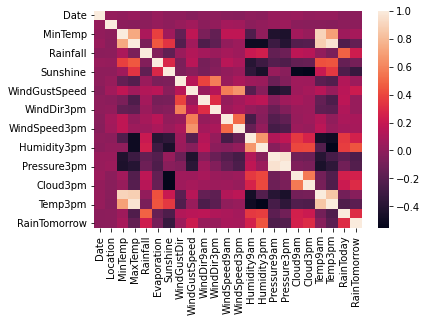

In [ ]:
sns.heatmap(prep.corr())

In [ ]:
def DataSplit(dataset,frac):
  train=dataset.sample(frac=0.8,random_state=rand.randint(0,dataset.shape[0])) #random state is a seed value
  test=dataset.drop(train.index)
  return train,test

datatrain,datatest = DataSplit(prep,0.8)

In [ ]:
datatrain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
35108,0.586608,0.791667,0.390244,0.480769,0.000000,0.020690,0.714286,0.933333,0.356589,0.466667,0.933333,0.130769,0.252874,0.38,0.29,0.606557,0.580645,0.111111,0.222222,0.468085,0.490196,0.0,0.0
125875,0.721689,0.750000,0.536585,0.403846,0.021563,0.027586,0.500000,0.600000,0.209302,0.533333,0.666667,0.130769,0.229885,0.91,0.85,0.606557,0.612903,0.444444,0.444444,0.468085,0.411765,1.0,1.0
139620,0.218923,0.270833,0.829268,0.730769,0.000000,0.055172,0.642857,0.466667,0.224806,0.466667,0.933333,0.100000,0.321839,0.61,0.47,0.475410,0.451613,0.666667,0.777778,0.787234,0.745098,0.0,0.0
29806,0.892576,0.708333,0.512195,0.423077,0.000000,0.020690,0.500000,0.866667,0.496124,0.933333,0.866667,0.238462,0.402299,0.51,0.44,0.377049,0.403226,0.111111,0.444444,0.489362,0.411765,0.0,0.0
29055,0.673945,0.708333,0.414634,0.384615,0.000000,0.027586,0.500000,0.933333,0.186047,0.466667,0.466667,0.000000,0.000000,1.00,1.00,0.655738,0.661290,0.888889,0.888889,0.425532,0.313725,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106883,0.508879,1.000000,0.414634,0.442308,0.000000,0.027586,0.500000,0.733333,0.387597,0.533333,0.733333,0.230769,0.298851,0.53,0.24,0.737705,0.741935,0.444444,0.444444,0.404255,0.450980,0.0,0.0
63913,0.919360,0.729167,0.365854,0.365385,0.000000,0.027586,0.500000,0.866667,0.155039,0.466667,0.000000,0.053846,0.172414,0.90,0.59,0.524590,0.483871,0.888889,0.888889,0.340426,0.372549,0.0,1.0
84466,0.204367,0.145833,0.658537,0.730769,0.000000,0.048276,0.642857,0.866667,0.310078,0.933333,0.866667,0.084615,0.218391,0.45,0.18,0.475410,0.435484,0.555556,0.333333,0.744681,0.745098,0.0,0.0
77270,0.790975,0.687500,0.268293,0.346154,0.000000,0.000000,0.285714,0.200000,0.209302,0.333333,0.400000,0.069231,0.218391,0.98,0.76,0.737705,0.741935,0.888889,0.444444,0.297872,0.372549,0.0,0.0


In [ ]:
datatest

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,0.115575,0.041667,0.365854,0.557692,0.000000,0.027586,0.5,0.933333,0.294574,0.400000,1.000000,0.030769,0.252874,0.44,0.25,0.491803,0.483871,0.444444,0.444444,0.510638,0.568627,0.0,0.0
13,0.119068,0.041667,0.487805,0.480769,0.008086,0.027586,0.5,0.800000,0.294574,0.866667,0.733333,0.184615,0.229885,0.65,0.43,0.344262,0.387097,0.444444,0.777778,0.468085,0.470588,1.0,0.0
19,0.120815,0.041667,0.414634,0.557692,0.000000,0.027586,0.5,0.666667,0.155039,0.600000,0.400000,0.130769,0.068966,0.45,0.26,0.639344,0.645161,0.444444,0.444444,0.468085,0.549020,0.0,0.0
20,0.121106,0.041667,0.463415,0.634615,0.000000,0.027586,0.5,0.533333,0.139535,0.600000,0.600000,0.069231,0.103448,0.56,0.28,0.639344,0.596774,0.444444,0.444444,0.553191,0.627451,0.0,0.0
21,0.121397,0.041667,0.609756,0.711538,0.000000,0.027586,0.5,0.266667,0.286822,0.266667,0.200000,0.130769,0.252874,0.38,0.28,0.540984,0.500000,0.444444,0.111111,0.659574,0.705882,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145437,0.993595,0.854167,0.268293,0.442308,0.000000,0.027586,0.5,0.066667,0.255814,0.133333,0.000000,0.146154,0.195402,0.42,0.22,0.786885,0.758065,0.444444,0.444444,0.319149,0.450980,0.0,0.0
145450,0.997380,0.854167,0.317073,0.538462,0.000000,0.027586,0.5,0.000000,0.139535,0.600000,0.000000,0.084615,0.126437,0.53,0.24,0.704918,0.693548,0.444444,0.444444,0.404255,0.549020,0.0,0.0
145451,0.997671,0.854167,0.341463,0.519231,0.000000,0.027586,0.5,0.133333,0.193798,0.533333,0.133333,0.115385,0.195402,0.53,0.25,0.737705,0.741935,0.444444,0.444444,0.382979,0.549020,0.0,0.0
145452,0.997962,0.854167,0.390244,0.461538,0.000000,0.027586,0.5,0.133333,0.271318,0.600000,0.000000,0.146154,0.298851,0.56,0.32,0.786885,0.758065,0.444444,0.777778,0.382979,0.490196,0.0,0.0


In [ ]:
datatrain[['RainToday','RainTomorrow']]

,RainToday,RainTomorrow
35108,0.0,0.0
125875,1.0,1.0
139620,0.0,0.0
29806,0.0,0.0
29055,0.0,1.0
...,...,...
106883,0.0,0.0
63913,0.0,1.0
84466,0.0,0.0
77270,0.0,0.0


In [ ]:
def DatasetTargetToArray(dataset,label_target=None):
  if label_target != None:
    arr = dataset[label_target].to_numpy()
    if len(label_target) == 1 :
      label = []
      for i in arr:
        label.append(i[0])
      arr = np.array(label)
    return dataset.drop(columns=label_target).to_numpy(),arr
  else: return dataset.to_numpy()


train1X,train1Y = DatasetTargetToArray(datatrain,['RainTomorrow'])
test1X,test1Y = DatasetTargetToArray(datatest,['RainTomorrow'])

train2X,train2Y = DatasetTargetToArray(datatrain,['RainToday','RainTomorrow'])
test2X,test2Y = DatasetTargetToArray(datatest,['RainToday','RainTomorrow'])

In [ ]:
train1X

array([[0.58660844, 0.79166667, 0.3902439 , ..., 0.46808511, 0.49019608,
        0.        ],
       [0.7216885 , 0.75      , 0.53658537, ..., 0.46808511, 0.41176471,
        1.        ],
       [0.21892285, 0.27083333, 0.82926829, ..., 0.78723404, 0.74509804,
        0.        ],
       ...,
       [0.20436681, 0.14583333, 0.65853659, ..., 0.74468085, 0.74509804,
        0.        ],
       [0.79097525, 0.6875    , 0.26829268, ..., 0.29787234, 0.37254902,
        0.        ],
       [0.54876274, 0.95833333, 0.41463415, ..., 0.46808511, 0.49019608,
        0.        ]])

In [ ]:
train1Y

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
test1X

array([[0.11557496, 0.04166667, 0.36585366, ..., 0.5106383 , 0.56862745,
        0.        ],
       [0.11906841, 0.04166667, 0.48780488, ..., 0.46808511, 0.47058824,
        1.        ],
       [0.12081514, 0.04166667, 0.41463415, ..., 0.46808511, 0.54901961,
        0.        ],
       ...,
       [0.99767103, 0.85416667, 0.34146341, ..., 0.38297872, 0.54901961,
        0.        ],
       [0.99796215, 0.85416667, 0.3902439 , ..., 0.38297872, 0.49019608,
        0.        ],
       [0.99825328, 0.85416667, 0.36585366, ..., 0.38297872, 0.49019608,
        0.        ]])

In [ ]:
test1Y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
train2X

array([[0.58660844, 0.79166667, 0.3902439 , ..., 0.22222222, 0.46808511,
        0.49019608],
       [0.7216885 , 0.75      , 0.53658537, ..., 0.44444444, 0.46808511,
        0.41176471],
       [0.21892285, 0.27083333, 0.82926829, ..., 0.77777778, 0.78723404,
        0.74509804],
       ...,
       [0.20436681, 0.14583333, 0.65853659, ..., 0.33333333, 0.74468085,
        0.74509804],
       [0.79097525, 0.6875    , 0.26829268, ..., 0.44444444, 0.29787234,
        0.37254902],
       [0.54876274, 0.95833333, 0.41463415, ..., 0.44444444, 0.46808511,
        0.49019608]])

In [ ]:
train2Y

array([[0., 0.],
       [1., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
test2X

array([[0.11557496, 0.04166667, 0.36585366, ..., 0.44444444, 0.5106383 ,
        0.56862745],
       [0.11906841, 0.04166667, 0.48780488, ..., 0.77777778, 0.46808511,
        0.47058824],
       [0.12081514, 0.04166667, 0.41463415, ..., 0.44444444, 0.46808511,
        0.54901961],
       ...,
       [0.99767103, 0.85416667, 0.34146341, ..., 0.44444444, 0.38297872,
        0.54901961],
       [0.99796215, 0.85416667, 0.3902439 , ..., 0.77777778, 0.38297872,
        0.49019608],
       [0.99825328, 0.85416667, 0.36585366, ..., 0.44444444, 0.38297872,
        0.49019608]])

In [ ]:
test2Y

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

#PEMODELAN AUTO ML

##AUTO ML Auto-Sklearn

In [ ]:
from autosklearn import classification as autocls

Auto ML single label

In [ ]:
automl1 = autocls.AutoSklearnClassifier(include = {
    'feature_preprocessor': ["no_preprocessing"]
})

In [ ]:
automl1.fit(train1X, train1Y)

[WARNING] [2022-02-25 02:39:05,845:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 367 not found
[WARNING] [2022-02-25 02:39:05,846:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 266 not found
[WARNING] [2022-02-25 02:39:05,846:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 426 not found
[WARNING] [2022-02-25 02:39:05,847:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 262 not found
[WARNING] [2022-02-25 02:39:05,847:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 605 not found
[WARNING] [2022-02-25 02:39:05,847:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 206 not found
[WARNING] [2022-02-25 02:39:05,847:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 657 not found
[WARNING] [2022-02-25 02:39:05,847:Client-AutoMLSMBO(1)::182b0266-95e4-11ec-8121-0242ac1c0002] Configuration 369 not found
[WARNING] [2022-

AutoSklearnClassifier(include={'feature_preprocessor': ['no_preprocessing']},
                      per_run_time_limit=360)

In [ ]:
print(automl1.show_models())

{17: {'model_id': 17, 'rank': 1, 'cost': 0.13987839001291436, 'ensemble_weight': 0.18, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f01f678d110>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f01f67945d0>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f01f65bc050>, 'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=False, l2_regularization=1e-10,
                               learning_rate=0.16262682406125173, max_iter=512,
                               max_leaf_nodes=66, n_iter_no_change=0,
                               random_state=1, validation_fraction=None,
                               warm_start=True)}, 28: {'model_id': 28, 'rank': 2, 'cost': 0.14012053379250966, 'ensemble_weight': 0.04, 'data_preprocessor': <autosklearn.pipeline.components

In [ ]:
print(automl1.sprint_statistics())

auto-sklearn results:
  Dataset name: 182b0266-95e4-11ec-8121-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.860122
  Number of target algorithm runs: 38
  Number of successful target algorithm runs: 27
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 4



In [ ]:
automl1.cv_results_['params'][np.argmax(automl1.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'classifier:__choice__': 'gradient_boosting',
 'classifier:gradient_boosting:early_stop': 'off',
 'classifier:gradient_boosting:l2_regularization': 1e-10,
 'classifier:gradient_boosting:learning_rate': 0.16262682406125173,
 'classifier:gradient_boosting:loss': 'auto',
 'classifier:gradient_boosting:max_bins': 255,
 'classifier:gradient_boosting:max_depth': 'None',
 'classifier:gradient_boosting:max_leaf_nodes': 66,
 'classifier:gradient_boosting:min_samples_leaf': 20,
 'classifier:gradient_boosting:scoring': 'loss',
 'classifier:gradient_boosting:tol': 1e-07,
 'data_preprocessor:__choice__': 'feature_type',
 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0054285872414491

In [ ]:
autoskpredict1 = automl1.predict(test1X)

In [ ]:
autoskpredict1

array([0., 0., 0., ..., 0., 0., 0.])

auto ML multi-label

In [ ]:
automl2 = autocls.AutoSklearnClassifier(include = {
    'feature_preprocessor': ["no_preprocessing"]
})

In [ ]:
automl2.fit(train2X, train2Y)

In [ ]:
print(automl2.show_models())

In [ ]:
print(automl2.sprint_statistics())

In [ ]:
automl2.cv_results_['params'][np.argmax(automl2.cv_results_['mean_test_score'])]

In [ ]:
autoskpredict2 = automl1.predict(test2X)

In [ ]:
autoskpredict2

##AUTO ML TPOT

In [ ]:
import tpot

In [ ]:
tcls1 = tpot.TPOTClassifier()
tcls2 = tpot.TPOTClassifier()

TPOT CLASSIFICATION SINGLE LABEL

In [ ]:
try:
  tcls1.fit(train1X, train1Y)
except :
  print("TPOT TIDAK MENERIMA SINGLE-LABEL PREDICTION")

In [ ]:
tpotpredict1 = tcls1.predict(test1X)

TPOT CLASSIFICATION MULTI-LABEL

In [ ]:
try:
  tcls2.fit(train2X, train2Y)
  tpotpredict1 = tcls1.predict(test2X)
except :
  print("TPOT TIDAK MENERIMA MULTI-LABEL PREDICTION")

#EVALUATION

In [ ]:
test1Y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
import sklearn.metrics as mtr

In [ ]:
cm = mtr.confusion_matrix(test1Y,autoskpredict1)
cm

array([[21783,     0],
       [ 6374,     0]])

In [ ]:
mtr.accuracy_score(test1Y,autoskpredict1)

0.8630891075043506

In [ ]:
mtr.accuracy_score(test2Y,autoskpredict2)

In [ ]:
mtr.accuracy_score(test1Y,tpotpredict1)